In [52]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
filepath = "MAL_anime_dataset/MAL_data_final.csv"

ml_anime_df = pd.read_csv(filepath)
ml_anime_df.head()

,score,num_list_users,num_favorites,media_type,rating,studios,genres,demographics
0,9.14,2897486,202552,tv,r,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Shounen']
1,9.05,2387337,182740,tv,pg_13,"['Madhouse', 'Studio Live']","['Action', 'Adventure', 'Fantasy']",['Shounen']
2,9.08,2248209,171579,tv,pg_13,['White Fox'],"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['no demographic']
3,8.65,1893379,167571,tv,pg_13,['Toei Animation'],"['Action', 'Adventure', 'Fantasy']",['Shounen']
4,8.62,3421349,155891,tv,r,['Madhouse'],"['Psychological', 'Supernatural', 'Suspense']",['Shounen']


In [51]:
ml_anime_df.shape

(12829, 8)

In [4]:
ml_anime_df.dtypes

score             float64
num_list_users      int64
num_favorites       int64
media_type         object
rating             object
studios            object
genres             object
demographics       object
dtype: object

In [5]:
type(ml_anime_df['studios'][0])

str

In [6]:
ml_anime_df['studios'] = ml_anime_df['studios'].apply(literal_eval)
ml_anime_df['genres'] = ml_anime_df['genres'].apply(literal_eval)
ml_anime_df['demographics'] = ml_anime_df['demographics'].apply(literal_eval)

In [7]:
type(ml_anime_df['studios'][0])

list

In [8]:
mlb = MultiLabelBinarizer()

studios = ml_anime_df['studios']
genres = ml_anime_df['genres']
demographics = ml_anime_df['demographics']

In [9]:
studios_df = pd.DataFrame(mlb.fit_transform(studios),columns=mlb.classes_, index=ml_anime_df.index)

studios_df.head()

,10Gauge,2:10 AM Animation,81 Produce,8bit,A-1 Pictures,A-Line,A-Real,A.C.G.T.,ACC Production,AHA Entertainment,...,helo.inc,iDRAGONS Creative Studio,ixtl,l-a-unch・BOX,monofilmo,production doA,studio MOTHER,team Yamahitsuji,teamKG,ufotable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
genres_df = pd.DataFrame(mlb.fit_transform(genres),columns=mlb.classes_, index=ml_anime_df.index)

genres_df.head()

,Action,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,Combat Sports,...,Super Power,Supernatural,Survival,Suspense,Team Sports,Time Travel,Vampire,Video Game,Visual Arts,Workplace
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [11]:
demographics_df = pd.DataFrame(mlb.fit_transform(demographics),columns=mlb.classes_, index=ml_anime_df.index)

demographics_df.head()

,Josei,Seinen,Shoujo,Shounen,no demographic
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0


In [12]:
ml_anime_df.head()

,score,num_list_users,num_favorites,media_type,rating,studios,genres,demographics
0,9.14,2897486,202552,tv,r,[Bones],"[Action, Adventure, Drama, Fantasy, Military]",[Shounen]
1,9.05,2387337,182740,tv,pg_13,"[Madhouse, Studio Live]","[Action, Adventure, Fantasy]",[Shounen]
2,9.08,2248209,171579,tv,pg_13,[White Fox],"[Drama, Psychological, Sci-Fi, Suspense, Time ...",[no demographic]
3,8.65,1893379,167571,tv,pg_13,[Toei Animation],"[Action, Adventure, Fantasy]",[Shounen]
4,8.62,3421349,155891,tv,r,[Madhouse],"[Psychological, Supernatural, Suspense]",[Shounen]


In [13]:
full_model_df = pd.concat([ml_anime_df, studios_df, genres_df, demographics_df], axis=1)

full_model_df.head()

,score,num_list_users,num_favorites,media_type,rating,studios,genres,demographics,10Gauge,2:10 AM Animation,...,Time Travel,Vampire,Video Game,Visual Arts,Workplace,Josei,Seinen,Shoujo,Shounen,no demographic
0,9.14,2897486,202552,tv,r,[Bones],"[Action, Adventure, Drama, Fantasy, Military]",[Shounen],0,0,...,0,0,0,0,0,0,0,0,1,0
1,9.05,2387337,182740,tv,pg_13,"[Madhouse, Studio Live]","[Action, Adventure, Fantasy]",[Shounen],0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.08,2248209,171579,tv,pg_13,[White Fox],"[Drama, Psychological, Sci-Fi, Suspense, Time ...",[no demographic],0,0,...,1,0,0,0,0,0,0,0,0,1
3,8.65,1893379,167571,tv,pg_13,[Toei Animation],"[Action, Adventure, Fantasy]",[Shounen],0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.62,3421349,155891,tv,r,[Madhouse],"[Psychological, Supernatural, Suspense]",[Shounen],0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
full_model_df.drop(['studios', 'genres', 'demographics'], axis=1, inplace=True)

In [15]:
full_model_df.head()

,score,num_list_users,num_favorites,media_type,rating,10Gauge,2:10 AM Animation,81 Produce,8bit,A-1 Pictures,...,Time Travel,Vampire,Video Game,Visual Arts,Workplace,Josei,Seinen,Shoujo,Shounen,no demographic
0,9.14,2897486,202552,tv,r,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9.05,2387337,182740,tv,pg_13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.08,2248209,171579,tv,pg_13,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,8.65,1893379,167571,tv,pg_13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.62,3421349,155891,tv,r,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
full_model_df = pd.get_dummies(data=full_model_df, columns=['media_type', 'rating'])

full_model_df.head()

,score,num_list_users,num_favorites,10Gauge,2:10 AM Animation,81 Produce,8bit,A-1 Pictures,A-Line,A-Real,...,media_type_ona,media_type_ova,media_type_special,media_type_tv,rating_g,rating_pg,rating_pg_13,rating_r,rating_r+,rating_rx
0,9.14,2897486,202552,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,9.05,2387337,182740,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,9.08,2248209,171579,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,8.65,1893379,167571,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.62,3421349,155891,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [17]:
# rows, columns
full_model_df.shape

(12829, 888)

In [18]:
full_model_df.columns

Index(['score', 'num_list_users', 'num_favorites', '10Gauge',
       '2:10 AM Animation', '81 Produce', '8bit', 'A-1 Pictures', 'A-Line',
       'A-Real',
       ...
       'media_type_ona', 'media_type_ova', 'media_type_special',
       'media_type_tv', 'rating_g', 'rating_pg', 'rating_pg_13', 'rating_r',
       'rating_r+', 'rating_rx'],
      dtype='object', length=888)

In [19]:
target = full_model_df['score']
predictors = full_model_df.drop(['score'], axis=1)

In [20]:
predictors.head()

,num_list_users,num_favorites,10Gauge,2:10 AM Animation,81 Produce,8bit,A-1 Pictures,A-Line,A-Real,A.C.G.T.,...,media_type_ona,media_type_ova,media_type_special,media_type_tv,rating_g,rating_pg,rating_pg_13,rating_r,rating_r+,rating_rx
0,2897486,202552,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2387337,182740,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2248209,171579,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1893379,167571,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,3421349,155891,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [21]:
X = np.array(predictors)
y = np.array(target)

In [22]:
X.shape

(12829, 887)

In [23]:
y.shape

(12829,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)
 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10263, 887)
(10263,)
(2566, 887)
(2566,)


In [28]:
# scale values

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [29]:
# build model
model = Sequential()

model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node

model.summary() # see what your model looks like

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              888000    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 1,514,001
Trainable params: 1,514,001
Non-trainable params: 0
_________________________________________________________________


In [30]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [33]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [34]:
# fit model and save history

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Train on 10263 samples, validate on 2566 samples
Epoch 1/5000
10263/10263 [==============================] - 4s 387us/step - loss: 1.5431 - mae: 0.9480 - val_loss: 0.4813 - val_mae: 0.5304: 2
Epoch 2/5000
10263/10263 [==============================] - 4s 361us/step - loss: 0.8068 - mae: 0.7326 - val_loss: 0.8320 - val_mae: 0.7268
Epoch 3/5000
10263/10263 [==============================] - 4s 361us/step - loss: 0.6160 - mae: 0.6263 - val_loss: 0.6821 - val_mae: 0.6801
Epoch 4/5000
10263/10263 [==============================] - 4s 366us/step - loss: 0.5200 - mae: 0.5738 - val_loss: 0.5048 - val_mae: 0.5675
Epoch 5/5000
10263/10263 [==============================] - 6s 559us/step - loss: 0.4357 - mae: 0.5239 - val_loss: 1.2473 - val_mae: 0.9531
Epoch 6/5000
10263/10263 [==============================] - 7s 669us/step - loss: 0.4097 - mae: 0.5079 - val_loss: 0.4212 - val_mae: 0.5052
Epoch 7/5000
10263/10263 [==============================] - 7s 672us/step - loss: 0.3572 - mae: 0.4704 - val

In [35]:
# check training and validation accuracy by epoch

history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

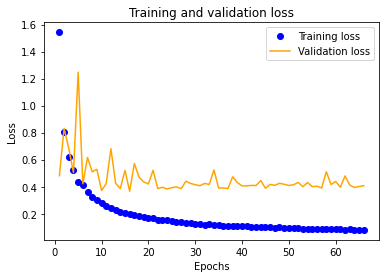

In [38]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

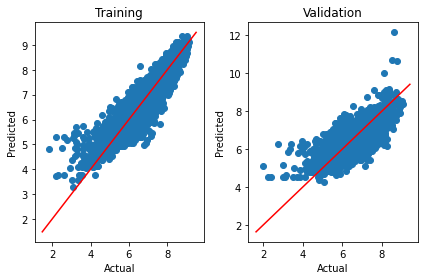

In [39]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [42]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

0.2555396076727596
0.45390482176307206


In [43]:
# Insert the dropout layer
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              888000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [44]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [45]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [46]:
# fit model and save history

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Train on 10263 samples, validate on 2566 samples
Epoch 1/5000
10263/10263 [==============================] - 4s 398us/step - loss: 2.4641 - mae: 1.2145 - val_loss: 1.5288 - val_mae: 1.0729
Epoch 2/5000
10263/10263 [==============================] - 4s 386us/step - loss: 1.6994 - mae: 1.0439 - val_loss: 2.9491 - val_mae: 1.5913
Epoch 3/5000
10263/10263 [==============================] - 4s 360us/step - loss: 1.5970 - mae: 1.0153 - val_loss: 0.5628 - val_mae: 0.5869
Epoch 4/5000
10263/10263 [==============================] - 5s 497us/step - loss: 1.4225 - mae: 0.9482 - val_loss: 0.6309 - val_mae: 0.6141
Epoch 5/5000
10263/10263 [==============================] - 5s 510us/step - loss: 1.2996 - mae: 0.9071 - val_loss: 0.8597 - val_mae: 0.7813
Epoch 6/5000
10263/10263 [==============================] - 6s 544us/step - loss: 1.2170 - mae: 0.8741 - val_loss: 1.6882 - val_mae: 1.1627
Epoch 7/5000
10263/10263 [==============================] - 5s 508us/step - loss: 1.1413 - mae: 0.8536 - val_lo

In [47]:
# check training and validation accuracy by epoch

history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

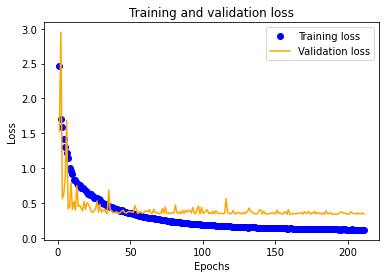

In [48]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

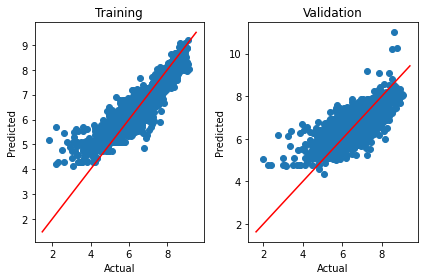

In [49]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [50]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

0.20382047681261153
0.4339887462476223


In [53]:
# trying plain linear regession

model = LinearRegression()

In [54]:
# give training data to learn
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# calculate R-squared (how well trend line fits data)
model.score(X_train, y_train)

0.5744272196349411

In [56]:
# R-squared value for test data
model.score(X_test, y_test)

# this is really bad (it's basically random guessing)

-1.548081091700621e+21

In [57]:
no_intercept = LinearRegression(fit_intercept=False)

In [58]:
no_intercept.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [59]:
no_intercept.score(X_train, y_train)

0.5744258766826171

In [60]:
no_intercept.score(X_test, y_test)

-9.153094813412734e+20